# American Sign Language Recognition Project
By Jacob Flores & Jason Flores

First we imported all packages needed, then we installed kaggle in order to download the American Sign Language dataset. Before exploring the data we confirmed that the amount of classes are the correct (29). Also, we made sure to have latest version of PyTorch and Torchvision.

#  0 - Imports

In [96]:
import torch
from torch import nn
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader, Subset, random_split
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
import random
import os

!pip install -q kaggle

os.environ['KAGGLE_USERNAME'] = "jacobbb593"
os.environ['KAGGLE_KEY'] = "56bc160421849119bc1cfde80d32e83f"

!kaggle datasets download -d grassknoted/asl-alphabet

!unzip -q -o asl-alphabet.zip -d asl_alphabet_data


data_path = "asl_alphabet_data/asl_alphabet_train/asl_alphabet_train"
print("Classes found:", os.listdir(data_path)[:5])
print("Total classes:", len(os.listdir(data_path)))

# Check Version
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
 92%|███████████████████████████████████▉   | 969M/1.03G [00:00<00:00, 1.04GB/s]
100%|██████████████████████████████████████| 1.03G/1.03G [00:00<00:00, 1.12GB/s]
Classes found: ['.DS_Store', 'R', 'U', 'I', 'N']
Total classes: 30
PyTorch version: 2.8.0
torchvision version: 0.23.0


# 1 - Getting a Dataset

After having the dataset download we decided to modified it based on our needs. So we transformed it by reducing the size of images from 200x200(originally) to 64x64 so that we can process the images faster.

After having that modified, we decided to reduce our dataset (from 87,000 images to 5,000 images). This is because we are looking for efficiency in our project and to reduce the amount of time during the training.

As usual, we split into 80% train and 20% test so that we have a balance between the data.

After having that defined we create a Dataloader for training and test set. Then we print the dataset that we have defined.

After having the dataset that we are going to use, we explored the whole dataset by looking at lenghts, tensor values, classes names, classes index. In addition we checked input and output shapes of our data and then we visualize each class.



In [2]:
data_dir = "asl_alphabet_data/asl_alphabet_train/asl_alphabet_train"

In [3]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

full_dataset = datasets.ImageFolder(root=data_dir,
                                    transform=transform)


In [4]:
# Use a smaller subset for faster training (5000 samples)
subset_indices = random.sample(range(len(full_dataset)), 5000)
subset = Subset(full_dataset, subset_indices)

# split into 80% train and 20% test
train_size = int(0.8 * len(subset))
test_size = len(subset) - train_size

# random split
train_data, test_data = random_split(subset, [train_size, test_size])

train_loader = DataLoader(train_data,
                          batch_size = 64,
                          shuffle = True)

train_dataset = DataLoader(test_data,
                           batch_size = 64,
                           shuffle = False)

# get class labels from the original dataset
classes = full_dataset.classes

print(f"Using {len(train_dataset)} samples from {len(classes)} classes")

Using 16 samples from 29 classes


In [5]:
len(train_data.dataset), len(test_data.dataset)

(5000, 5000)

In [6]:
len(train_data), len(test_data)

(4000, 1000)

In [7]:
image, label = train_data[0]
image, label

(tensor([[[-0.8588, -0.6627, -0.6627,  ..., -0.7569, -0.7333, -0.7882],
          [-0.6471, -0.1529, -0.1686,  ..., -0.4980, -0.4745, -0.6157],
          [-0.5373,  0.0824,  0.0431,  ..., -0.4275, -0.4275, -0.6000],
          ...,
          [-0.9059, -0.8118, -0.8196,  ..., -0.1608, -0.1608, -0.3804],
          [-0.8980, -0.7804, -0.7882,  ..., -0.0980, -0.1451, -0.3882],
          [-0.9373, -0.8902, -0.8902,  ..., -0.1451, -0.2863, -0.5137]],
 
         [[-0.8510, -0.6706, -0.6706,  ..., -0.7804, -0.7882, -0.8275],
          [-0.6078, -0.1137, -0.1373,  ..., -0.6000, -0.5843, -0.6627],
          [-0.4824,  0.2314,  0.2000,  ..., -0.5529, -0.5608, -0.6706],
          ...,
          [-0.8745, -0.7412, -0.7725,  ..., -0.2078, -0.2157, -0.3882],
          [-0.8980, -0.7882, -0.8039,  ..., -0.1765, -0.2078, -0.3882],
          [-0.9373, -0.9059, -0.9216,  ..., -0.2392, -0.3647, -0.5373]],
 
         [[ 0.7176,  0.4510,  0.4353,  ...,  0.3255,  0.3569,  0.5059],
          [ 0.4824, -0.0275,

In [8]:
class_names = full_dataset.classes
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [9]:
class_to_idx = full_dataset.class_to_idx
class_to_idx

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

## 1.1 - Check input and output shapes of data

In [10]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image label: U


## 1.2 - Visualizing our data

Image shape: torch.Size([3, 64, 64])


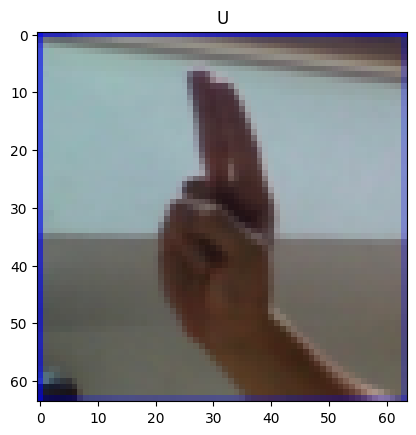

In [11]:
# Before we show a sample, notice how we change the image values, this is because
# we are performing reverse normalization in order to have pixel values in the range and avoid errors
image = image * 0.5 + 0.5 # You are going to see this more often along the way
print(f"Image shape: {image.shape}")
plt.imshow(image.permute(1, 2, 0))
plt.title(classes[label]);

In [12]:
# Get one image for each class
images = []
labels = []
for label in range(len(classes)):
    # Find the index of the first image with the current label
    index = next((i for i, (image, target) in enumerate(subset) if target == label), None)
    if index is not None:
        image, target = subset[index]
        images.append(image)
        labels.append(target)

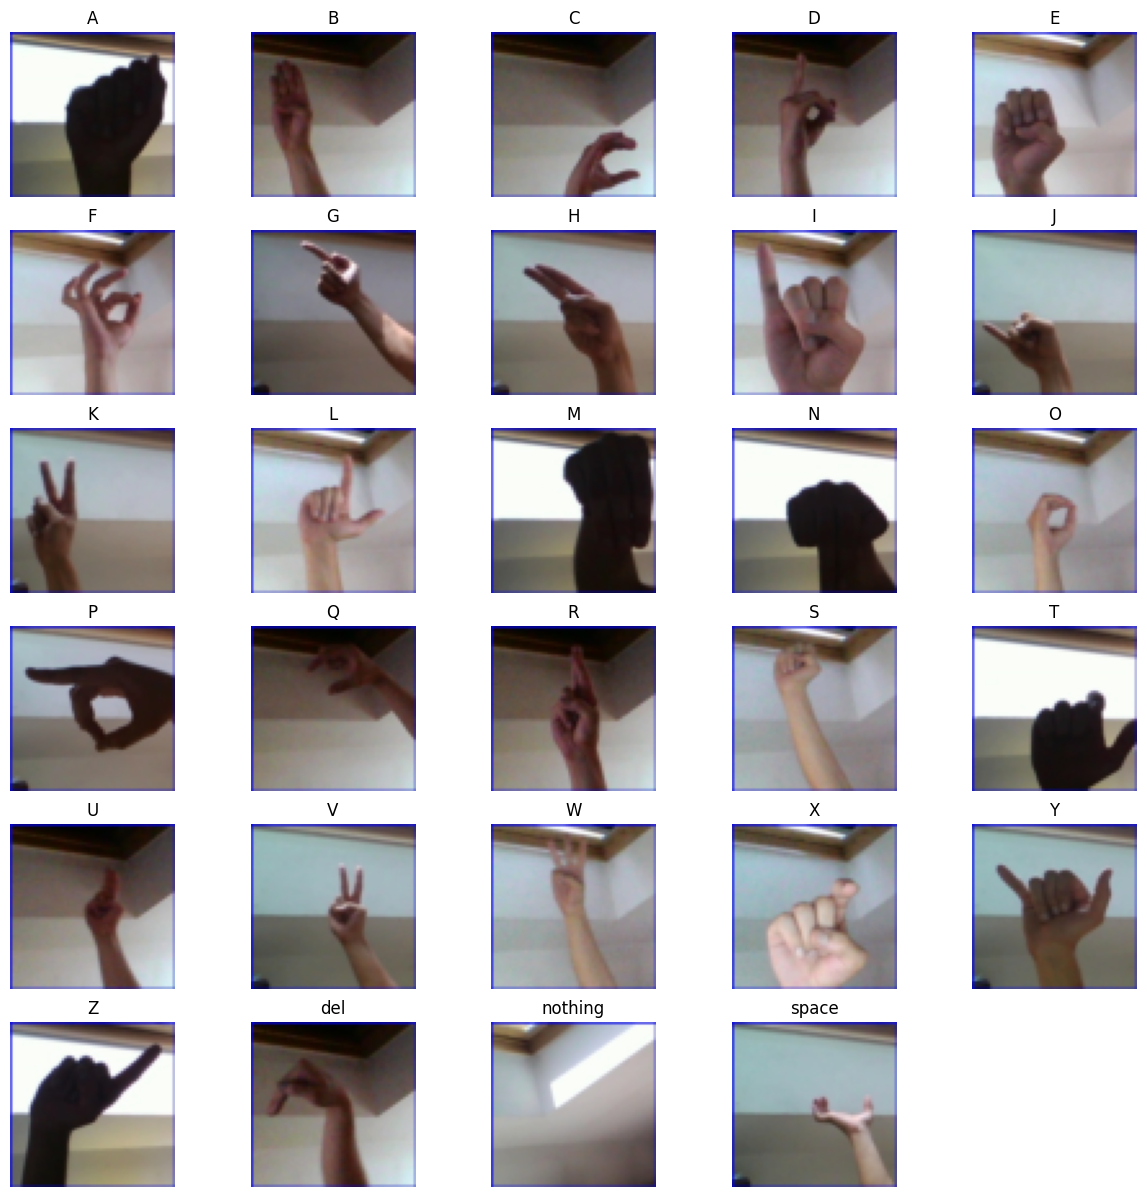

In [13]:
# Plot images
fig = plt.figure(figsize=(15, 15))
rows, cols = 6, 5  # Adjust rows and cols to fit all classes
for i in range(len(images)):
    img, label = images[i], labels[i]

    # Reverse normalization for display as mentioned earlier
    img = img * 0.5 + 0.5

    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(class_names[label])
    plt.axis(False)


In [14]:
train_data, test_data

(<torch.utils.data.dataset.Subset at 0x1043516d0>,
 <torch.utils.data.dataset.Subset at 0x104351450>)

# 2 - Prepare DataLoader

This part prepares data batches for training and testing. First we defined our batch size. By using DataLoader, the training and testing datasets are converted into iterable objects. As we can see in the code the training dataloader shuffles the data in each epoch so that we prevent the model to learn the order of the data. But the testing Dataloader does not shuffle the data as we rather consistent evaluation during the testing.

Then we check out the output, and further inspect the data by retrieving a single batch and printing its shape to confirm it is in the format we expect.

Finally an image from the batch is shown along with its label and shape to ensure the data is loaded and labeled correctly. This process is important to make sure that we are in the right track.

In [15]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              shuffle=True) # shuffle data every epoch?

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) # don't necessarily have to shuffle the testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x153f65a90>,
 <torch.utils.data.dataloader.DataLoader at 0x15264fe10>)

In [16]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x153f65a90>, <torch.utils.data.dataloader.DataLoader object at 0x15264fe10>)
Length of train dataloader: 125 batches of 32
Length of test dataloader: 32 batches of 32


In [17]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

Image size: torch.Size([3, 64, 64])
Label: 26, label size: torch.Size([])


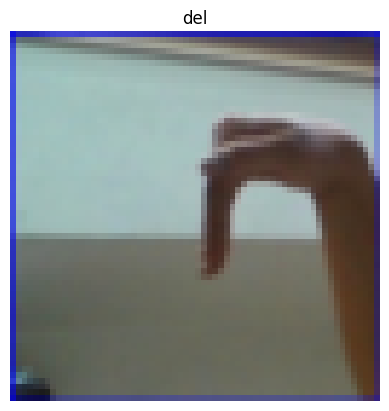

In [18]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

# Reverse normalization for display
img = img * 0.5 + 0.5

plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False);
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3 - BASELINE MODEL

After having worked on our dataset and dataloader, for the sake of getting to know our model better, we decided to implement a baseline model where we are using a flatten layer and where we are evaluating a simple sample. We implemented it because is the best way to know our model needs depending on how high the accuracy is or how low the loss is. Later on, we'll be creating more a non-linear model and a CNN model to see how much our model is learning in each one of them.

For making complex things we first have to start simple.

In [19]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Shape after flattening: torch.Size([3, 4096]) -> [color_channels, height*width]


In [20]:
from torch import nn

# Baseline model definition along with its forward function
# we did it with just two linear layers to make it simple enough
class ASLBaseline(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [21]:
torch.manual_seed(42)

# Create an instance model_0
model_0 = ASLBaseline(
    input_shape = 3*64*64,
    hidden_units = 10,
    output_shape=len(class_names)
).to("cpu")

model_0

ASLBaseline(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12288, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=29, bias=True)
  )
)

In [22]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 6.8970e-03,  7.4876e-03, -2.1134e-03,  ...,  6.6472e-04,
                       -4.7116e-03, -5.2405e-03],
                      [-1.9907e-04,  3.1398e-03, -8.3313e-03,  ...,  4.0213e-03,
                        6.6041e-03,  5.0459e-03],
                      [ 6.0608e-03, -5.4492e-03,  7.6998e-03,  ...,  3.5302e-05,
                       -6.7376e-03,  7.3019e-03],
                      ...,
                      [-4.3874e-03,  1.9926e-04,  7.9915e-03,  ..., -5.0085e-03,
                       -3.9315e-03, -7.5393e-03],
                      [ 4.2025e-03, -1.3148e-03, -2.7806e-03,  ..., -5.4377e-03,
                       -4.8458e-03,  3.0181e-03],
                      [ 3.0575e-03,  5.3473e-03, -7.9494e-03,  ..., -8.9380e-03,
                        8.5260e-03,  2.1958e-03]])),
             ('layer_stack.1.bias',
              tensor([ 0.0036,  0.0022,  0.0069, -0.0080, -0.0077,  0.0016, -0.0080,  0.0013,
                

## 3.1 - Setup loss, optimizer and evaluation metrics

In [23]:
import requests
from pathlib import Path

# Download helper functions if we do not have it. This will help us having an accuracy value
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [24]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # For multi classification
optimizer = torch.optim.SGD(params=model_0.parameters(), # stochastic gradient descent as usual
                            lr=0.01)

## 3.2 - Creating a function to time our experiments

As ML is very experimental, two of the main things we'll often want to track are the model's performance and how fast it runs

Please find our timing function below:

In [25]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [26]:
# Quick example to see how if it works
start_time = timer()

end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


1.1457999789854512e-05

## 3.3 - Creating a training loop and training model on batches of data

In [27]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time as mentioned in our first presentation)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------


Looked at 0/4000 samples.

Train loss: 3.2150 | Test loss: 3.0250, Test acc: 13.2812
Epoch: 1
------
Looked at 0/4000 samples.

Train loss: 2.9529 | Test loss: 2.9204, Test acc: 16.2109
Epoch: 2
------
Looked at 0/4000 samples.

Train loss: 2.7734 | Test loss: 2.7382, Test acc: 21.5820
Train time on cpu: 7.733 seconds


## 3.4 - Make predictions and get Model 0 results

In [28]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/32 [00:00<?, ?it/s]

{'model_name': 'ASLBaseline',
 'model_loss': 2.7381765842437744,
 'model_acc': 21.58203125}

## 3.5 Setup device agnostic-code (for using a GPU if there is one)

In [29]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [30]:
torch.cuda.is_available()

False

In [31]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 4 - Model 1: Building a better model with non-linearity

Once built our baseline model, we've noticed the lack of accuracy as well as a high loss, reason why we've decided to implement a better model with non-linearity.

In [32]:
# Create a model with non-linear and linear layers along with its forward function
# Here we are using ReLU unlike the baseline model where we trated it as a linear model
class ASLModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [33]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = ASLModelV1(input_shape=12288, # this is the output of the flatten after our 3*64*64 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it's available
next(model_1.parameters()).device

device(type='cpu')

## 4.1 - Setup loss, optimizer and evaluation metrics

In [34]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.01)

## 4.2 - Functoinizing training and evaluation/testing loops

In [35]:
# Here we are defining train_step in order to avoid rewriting it over and over again in case we implement more models
# in that way we would be saving memory and time, and the process would run smoothly and be more efficient
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

  # return the loss value and accuracy for future linear plots
  return train_loss.item(), train_acc

In [36]:
# Here we are defining test_step in order to avoid rewriting it over and over again in case we implement more models
# in that way we would be saving memory and time, and the process would run smoothly and be more efficient
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

    # return the loss value and accuracy for future plots
    return test_loss.item(), test_acc

In [37]:
# Here we are just calling the functions above along with the timer
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 3.31310 | Train acc: 7.00%
Test loss: 3.23865 | Test acc: 10.45%

Epoch: 1
----------
Train loss: 3.20223 | Train acc: 11.88%
Test loss: 3.15732 | Test acc: 13.09%

Epoch: 2
----------
Train loss: 3.10094 | Train acc: 15.78%
Test loss: 3.05620 | Test acc: 17.29%

Train time on cpu: 6.792 seconds


In [38]:
model_0_results

{'model_name': 'ASLBaseline',
 'model_loss': 2.7381765842437744,
 'model_acc': 21.58203125}

In [39]:
# Train time
total_train_time_model_0

7.7329329589992994

In [40]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [41]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/32 [00:00<?, ?it/s]

{'model_name': 'ASLModelV1',
 'model_loss': 3.056204080581665,
 'model_acc': 17.28515625}

In [42]:
model_0_results

{'model_name': 'ASLBaseline',
 'model_loss': 2.7381765842437744,
 'model_acc': 21.58203125}

# 5 - ASL Model 2: Building a Convolutional Neural Network (CNN)

Now after having implemented a baseline model and a better non-linear model, we've noticed that the accuracy can't even go beyond 50% which is kinda concerning, reason why we are going to implement Convolutional Neural Networks where we would be using two blocks for the data to go through along with 10 hidden units, please find it below

In [43]:
# Create a convolutional neural network
class ASLModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 16 * 16, # used to be 7 * 7
                  out_features = output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x


In [44]:
torch.manual_seed(42)
model_2 = ASLModelV2(input_shape = 3,
                 hidden_units = 10,
                 output_shape = len(class_names)).to(device)
model_2

ASLModelV2(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=29, bias=True)
  )
)

In [45]:
# Pass image through model
rand_image_tensor = torch.randn(size=(1, 3, 64, 64))

# Pass image through model
model_2(rand_image_tensor.to(device))

tensor([[ 0.1282,  0.0933,  0.0602, -0.0449, -0.0577,  0.0749, -0.0905,  0.1415,
          0.0035,  0.0949, -0.0194, -0.0308,  0.0029, -0.0799,  0.1232,  0.0477,
          0.0469,  0.0493, -0.0039,  0.1222, -0.0345, -0.0842,  0.0605,  0.0132,
          0.0390,  0.1593,  0.0406,  0.1068,  0.0161]],
       grad_fn=<AddmmBackward0>)

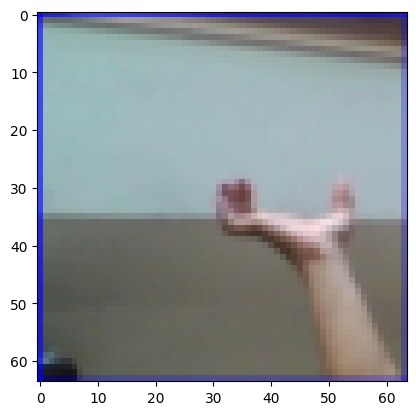

In [46]:
image = image * 0.5 + 0.5
plt.imshow(image.permute(1, 2, 0))

In [47]:
model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.1471,  0.1597, -0.0451],
                        [ 0.1768, -0.0422,  0.0388],
                        [-0.0937,  0.1130,  0.1697]],
              
                       [[-0.1412,  0.1673,  0.0360],
                        [ 0.1422,  0.0261,  0.0928],
                        [-0.0272,  0.1484,  0.0284]],
              
                       [[-0.0898,  0.0491, -0.0887],
                        [-0.0226, -0.0782,  0.1277],
                        [-0.1519, -0.0887, -0.0543]]],
              
              
                      [[[-0.1157,  0.0182, -0.1901],
                        [ 0.1738, -0.1635,  0.1486],
                        [ 0.0320, -0.0625,  0.1189]],
              
                       [[ 0.0300,  0.1555,  0.0210],
                        [-0.0607,  0.0517, -0.0522],
                        [ 0.0810,  0.1718,  0.1112]],
              
                       [[-0.0841,  0.1111,  0.0344],
                      

## 5.1 - Stepping through `nn.Conv2d()`

In [48]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing

print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [49]:
test_image.shape

torch.Size([3, 64, 64])

In [50]:
torch.manual_seed(42)

# Create a convolutional layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(dim=0)) # add an extra dimension for batch
conv_output.shape

torch.Size([1, 10, 62, 62])

In [51]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

## 5.2 - Stepping through `nn.MaxPool2d()`

In [52]:
test_image.shape

torch.Size([3, 64, 64])

In [53]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [54]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


## 5.3 - Setup a loss function and optimizer for model

In [55]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(),
                       lr = 0.001)

# Good try :(
"""loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)"""

'loss_fn = nn.CrossEntropyLoss()\noptimizer = torch.optim.SGD(params=model_2.parameters(),\n                            lr=0.1)'

## 5.4 - Training and Testing model using our training and test functions

In [56]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 11
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(data_loader=test_dataloader,
              model=model_2,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 3.11098 | Train acc: 12.03%
Test loss: 2.59556 | Test acc: 26.07%

Epoch: 1
---------
Train loss: 2.10855 | Train acc: 37.80%
Test loss: 1.90954 | Test acc: 43.55%

Epoch: 2
---------
Train loss: 1.35480 | Train acc: 58.80%
Test loss: 1.40252 | Test acc: 58.79%

Epoch: 3
---------
Train loss: 0.84911 | Train acc: 73.62%
Test loss: 1.21839 | Test acc: 65.92%

Epoch: 4
---------
Train loss: 0.53168 | Train acc: 83.75%
Test loss: 1.14679 | Test acc: 70.41%

Epoch: 5
---------
Train loss: 0.33893 | Train acc: 89.00%
Test loss: 1.22928 | Test acc: 68.85%

Epoch: 6
---------
Train loss: 0.26557 | Train acc: 91.40%
Test loss: 1.23714 | Test acc: 72.27%

Epoch: 7
---------
Train loss: 0.15526 | Train acc: 95.50%
Test loss: 1.35005 | Test acc: 74.12%

Epoch: 8
---------
Train loss: 0.12651 | Train acc: 95.88%
Test loss: 1.44298 | Test acc: 72.85%

Epoch: 9
---------
Train loss: 0.08711 | Train acc: 97.42%
Test loss: 1.45802 | Test acc: 75.10%

Epoch: 10
---------


In [57]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

  0%|          | 0/32 [00:00<?, ?it/s]

{'model_name': 'ASLModelV2',
 'model_loss': 1.5112760066986084,
 'model_acc': 74.8046875}

# 6 - Compare model results and training time

In [58]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,ASLBaseline,2.738177,21.582031
1,ASLModelV1,3.056204,17.285156
2,ASLModelV2,1.511276,74.804688


In [59]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,ASLBaseline,2.738177,21.582031,7.732933
1,ASLModelV1,3.056204,17.285156,6.791986
2,ASLModelV2,1.511276,74.804688,114.765343


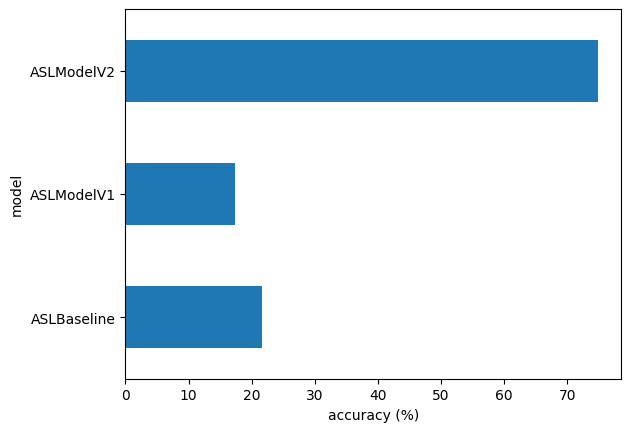

In [60]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

# 7 - Make and evaluate random predictions

In [61]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [62]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([3, 64, 64])

Text(0.5, 1.0, 'M')

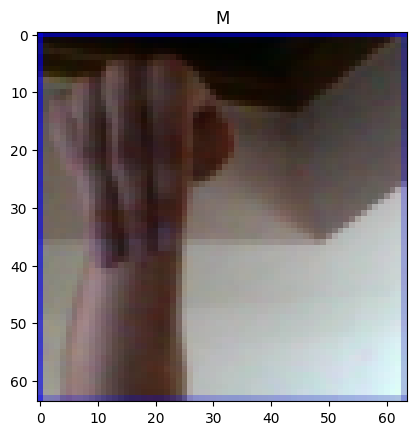

In [63]:
normalized_test_samples = [sample * 0.5 + 0.5 for sample in test_samples] # Reverse normalization
plt.imshow(normalized_test_samples[0].permute(1, 2, 0))
plt.title(class_names[test_labels[0]])

In [64]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[8.1274e-02, 7.8516e-01, 5.1796e-03, 2.7908e-03, 1.5220e-03, 2.4939e-07,
         2.8970e-09, 4.3426e-10, 3.4608e-08, 3.2861e-12, 1.5607e-07, 2.4556e-04,
         5.4527e-02, 4.5780e-05, 1.5246e-02, 5.8669e-05, 2.0206e-07, 1.6266e-08,
         3.6633e-04, 4.0015e-02, 1.2345e-02, 1.2345e-08, 1.5742e-05, 2.4959e-06,
         2.1725e-07, 1.2075e-03, 1.5312e-07, 1.4052e-07, 4.8577e-10],
        [8.2977e-16, 2.2637e-10, 2.2351e-11, 2.2112e-10, 2.8265e-09, 6.8822e-09,
         2.7622e-10, 1.1808e-09, 2.2932e-04, 9.6075e-05, 8.3982e-07, 7.0969e-08,
         2.4721e-04, 3.9524e-03, 2.4146e-05, 9.4734e-09, 1.4126e-07, 1.0884e-05,
         2.5315e-08, 4.1976e-08, 5.3223e-08, 1.0260e-08, 8.6390e-07, 5.8571e-05,
         8.0271e-04, 9.1909e-06, 9.9429e-01, 1.3235e-14, 2.8050e-04]])

In [65]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([ 1, 26,  2,  6, 15,  1, 22, 13,  9])

In [66]:
test_labels

[12, 26, 5, 6, 15, 1, 20, 13, 9]

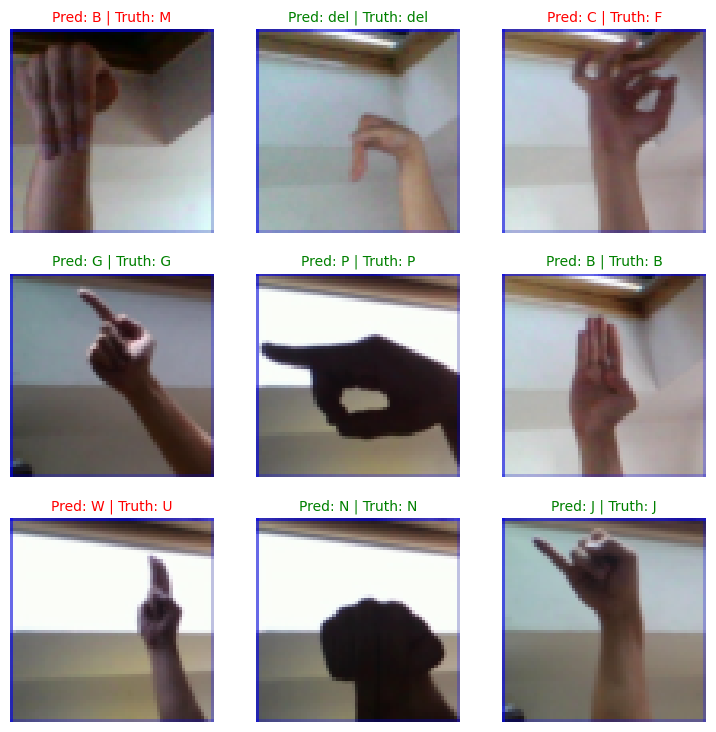

In [67]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  normalized_sample = sample * 0.5 + 0.5

  # Plot the target image
  plt.imshow(normalized_sample.permute(1, 2, 0))

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

Great! Now we can tell our model is actually learning something and not getting stuck in some accuracy value below 50% :,(

# 8 - Making a confusion matrix for further prediction evaluation

For those who doesn't know, a confustion matrix is an efficient way of evaluating our classification models by showcasing data visualizations where we can tell how accurate every class is based on the number of sample each one of them have

In [68]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/32 [00:00<?, ?it/s]

tensor([23, 14, 24, 22,  8, 20,  0,  8,  9, 24, 23,  1, 19,  8, 23,  8, 23,  3,
        10, 23, 24,  1, 21,  5,  2,  6, 18, 28, 13, 12, 23,  2,  9, 24, 26, 28,
        15, 18, 28, 20, 13, 27, 19,  0, 26, 16,  6, 25,  9, 15, 20, 24, 17, 24,
        15, 23, 21, 15, 12,  4, 13, 23, 13,  8, 28, 16, 28, 27,  6,  0,  4,  9,
        25, 15, 24, 13, 24, 23,  0, 20,  8, 20, 16, 20, 25, 18, 16,  7,  2, 28,
        28,  1, 28, 26, 21, 22,  3,  4, 13, 23, 10,  2, 21, 22, 17, 28,  8,  2,
        19,  9, 26,  6,  1, 18, 22, 10, 21,  7, 24, 15, 15, 21, 24, 13, 24, 19,
         5, 28,  2, 11, 16, 19, 28, 27, 22, 26, 17,  8, 12, 25, 12, 13, 13,  1,
         6, 10,  6, 11, 14, 24, 28, 20, 10, 16,  3,  0,  7,  3, 23, 24, 28, 24,
         6, 26,  1, 14, 21, 21, 12, 13, 15, 17, 18,  2,  8,  7, 20, 17, 21, 16,
         7, 17,  0,  5, 11, 26, 10, 23, 22, 26,  8, 25, 28,  4, 22, 24, 14, 19,
         5,  5,  9, 25, 27,  8, 13, 17, 28, 26, 20, 16, 18,  0, 25, 22, 17, 10,
        21, 19, 23, 13,  7,  2, 11,  8, 

In [69]:
len(y_pred_tensor)

1000

In [70]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 1.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.1 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [mlxtend]m1/3 [torchmetrics]
mlxtend version: 0.23.4


In [71]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [72]:
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [73]:
y_pred_tensor[:10]

tensor([23, 14, 24, 22,  8, 20,  0,  8,  9, 24])

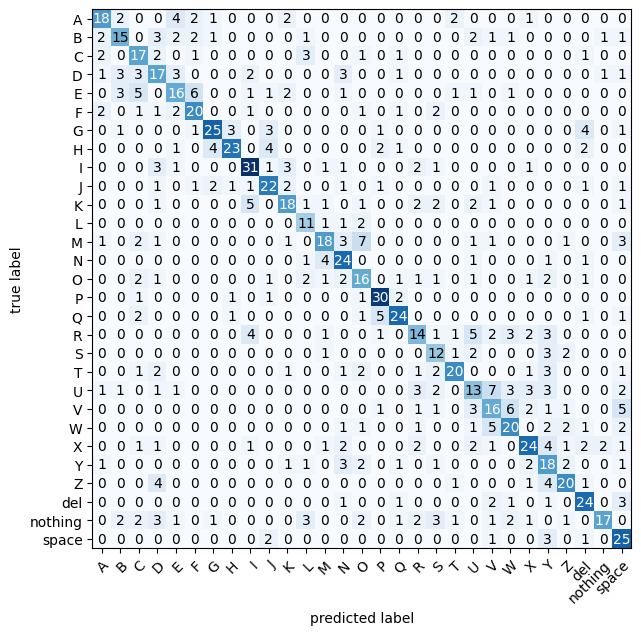

In [74]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))

# Here we are using a list comprehension that extracts the target labels from our test data,
# in other words, this is just iterating through our test dataset taking out only the target labels
# and putting them into a new list called targets in this case
targets = [label for _, label in test_data]

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=torch.tensor(targets))
                         #target=[label for _, label in test_data])
                         #target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

# 9 - Save and Load Model


In [75]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "ASL_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/ASL_Model.pth


In [76]:
image_shape = [3, 64, 64]

In [77]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = ASLModelV2(input_shape=3,
                        hidden_units=10,
                        output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

ASLModelV2(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=29, bias=True)
  )
)

In [78]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/32 [00:00<?, ?it/s]

{'model_name': 'ASLModelV2',
 'model_loss': 1.5112760066986084,
 'model_acc': 74.8046875}

In [79]:
model_2_results

{'model_name': 'ASLModelV2',
 'model_loss': 1.5112760066986084,
 'model_acc': 74.8046875}

In [80]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)

# 10 - Transfer Learning

After having started a baseline model, then builiding a better model with non-linearity, and then a CNN, we decided to perform transfer learning using a pre-trained ResNet18 model to find the most feasible model among the ones we have so far. We need a model that has the highest efficiency and accuracy and the lowest running time and loss.

We resized images to 200x200(same as originals) to hold the quality during training, converted them to tensors, and normalized pixel values to a common scale.

We loaded the dataset using ImageFolder, and increment the subset by using 10,000 samples (we need to find a balance between image size and number of samples to get the best performance). We decided to increment samples and size because ResNet18 allows us to perform faster computations and is used to process high amount of data.

We split the subset into 80% training and 20% testing like before.

Then we loaded the ResNet18 model and we decided to froze its convolutional layers so that it can retain the visual features it has already learned from ImageNet.

Just the final fully-connected (fc) layer is replaced and trained. We believe this reduced the training time and the risk of overfitting (that we have before) specially with this new dataset.

We used helper function like train_step and test_step to to track their results after each epoch.

After the training, we visualize the training and test loss curves, to see how well the model is learning. Then we printed the predicted and actual labels to see how the model performs after the training and to check if everything is okay.

To conclude we find transfer learning to be the most efficient among the models that we built, demonstraiting less run time and loss, and high accuracy.

Resnet18 documentation: https://debuggercafe.com/implementing-resnet18-in-pytorch-from-scratch/

## 10.1 - Create DataLoader for New Dataset

In [82]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
#from torchinfo import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(42)
random.seed(42)

# Path to your new dataset
new_data_dir = "asl_alphabet_data/asl_alphabet_train/asl_alphabet_train"

"""transforms.Normalize([0.485, 0.456, 0.406],
                     [0.229, 0.224, 0.225])"""

# Define transforms
new_transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Create the dataset
new_dataset = datasets.ImageFolder(root=new_data_dir, transform=new_transform)

# Use a smaller subset (10000 samples)
subset_indices = random.sample(range(len(new_dataset)), 10000)
subset = Subset(new_dataset, subset_indices)

train_size = int(0.8 * len(subset))
test_size = len(subset) - train_size
train_dataset, test_dataset = random_split(subset, [train_size, test_size])


# Create the DataLoader
train_dataloader = DataLoader(train_dataset,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(test_dataset,
                             batch_size=32,
                             shuffle=False)

num_new_classes = len(new_dataset.classes)


## 10.2 - Freeze Layers and changing the output layer to suit our needs

In [83]:
base_model = models.resnet18(pretrained=True)

for param in base_model.parameters():
  param.requires_grad = False

base_model.fc = nn.Linear(base_model.fc.in_features, num_new_classes)
base_model = base_model.to(device)

/Users/jasonflores/Desktop/Personal Projects/ASL-Recognition/venv/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jasonflores/Desktop/Personal Projects/ASL-Recognition/venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/jasonflores/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:03<00:00, 13.4MB/s]


In [84]:
len(class_names)

29

## 10.3 - Train Model

In [85]:
# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(base_model.fc.parameters(), lr=0.001)

In [86]:
# Lists to store losses for plotting
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
epochs = 10
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")

    # Train on the new dataset and get train loss
    train_loss, train_acc = train_step(data_loader=train_dataloader,
                           model= base_model,
                           loss_fn=loss_fn,
                           optimizer=optimizer,
                           accuracy_fn=accuracy_fn,
                           device=device)
    train_losses.append(train_loss)  # Append train loss and accuracy to list
    train_accuracies.append(train_acc)

    # Evaluate on the test dataset and get test loss
    test_loss, test_acc = test_step(data_loader=test_dataloader,
                          model= base_model,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn,
                          device=device)
    test_losses.append(test_loss)  # Append test loss and accuracy to list
    test_accuracies.append(test_acc)

Epoch: 0
---------
Train loss: 2.20810 | Train acc: 47.80%
Test loss: 1.40413 | Test acc: 73.71%

Epoch: 1
---------
Train loss: 1.12713 | Train acc: 78.04%
Test loss: 0.92178 | Test acc: 80.70%

Epoch: 2
---------
Train loss: 0.79570 | Train acc: 84.03%
Test loss: 0.71868 | Test acc: 84.47%

Epoch: 3
---------
Train loss: 0.63709 | Train acc: 86.97%
Test loss: 0.59842 | Test acc: 85.81%

Epoch: 4
---------
Train loss: 0.53795 | Train acc: 88.91%
Test loss: 0.52690 | Test acc: 88.05%

Epoch: 5
---------
Train loss: 0.46431 | Train acc: 90.24%
Test loss: 0.48939 | Test acc: 87.70%

Epoch: 6
---------
Train loss: 0.40846 | Train acc: 91.54%
Test loss: 0.45753 | Test acc: 88.69%

Epoch: 7
---------
Train loss: 0.36935 | Train acc: 92.39%
Test loss: 0.40096 | Test acc: 89.48%

Epoch: 8
---------
Train loss: 0.33506 | Train acc: 92.71%
Test loss: 0.38843 | Test acc: 89.58%

Epoch: 9
---------
Train loss: 0.30606 | Train acc: 93.50%
Test loss: 0.35697 | Test acc: 90.72%



## 10.4 - Evaluate model by plotting loss curves

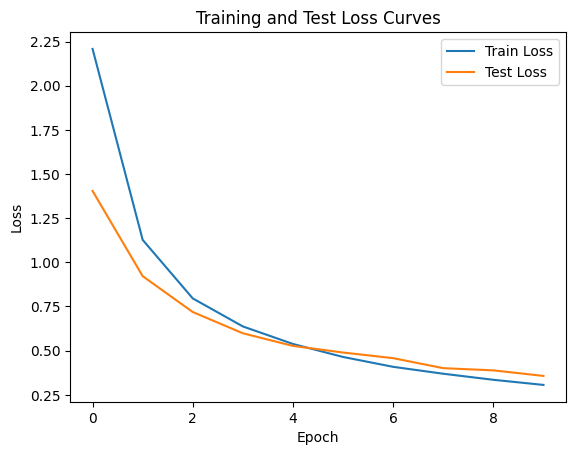

In [87]:
import matplotlib.pyplot as plt

# Plot the losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training and Test Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

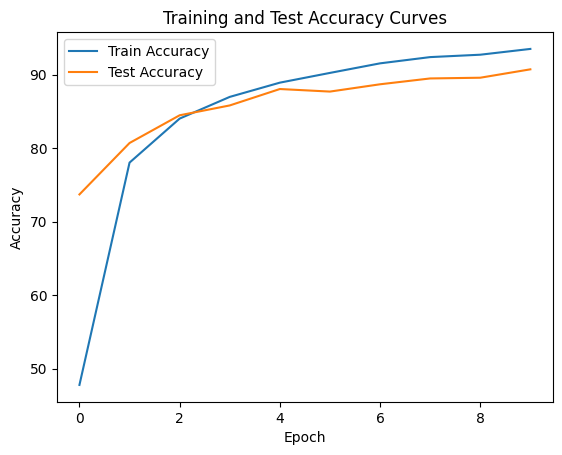

In [88]:
# Plot the accuracies
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Training and Test Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 10.5 - Transfer learning confusion matrix

Making predictions...:   0%|          | 0/63 [00:00<?, ?it/s]

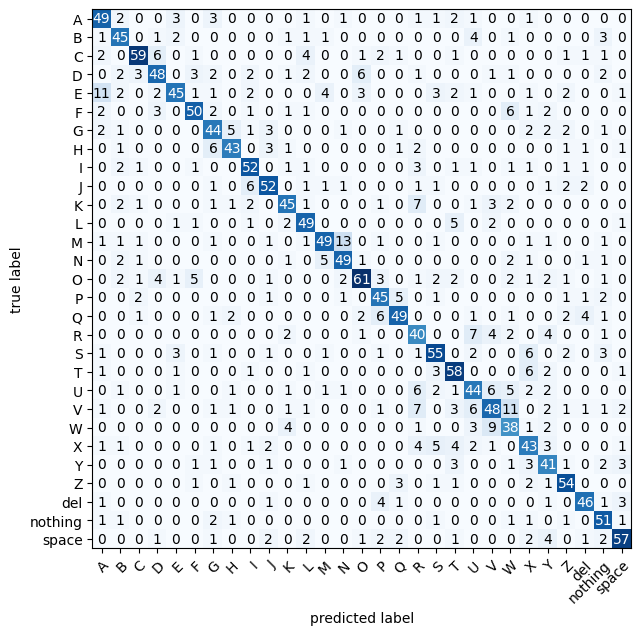

In [89]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = base_model(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))

# Here we are using a list comprehension that extracts the target labels from our test data,
# in other words, this is just iterating through our test dataset taking out only the target labels
# and putting them into a new list called targets in this case
targets = []
for _, label in test_dataloader: # iterate through the test_dataloader to get all target labels
  targets.extend(label.tolist()) # add the labels from the current batch to the targets list

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=torch.tensor(targets))
                         #target=[label for _, label in test_data])
                         #target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## 10.6 - Transfer learning plotting predictions images

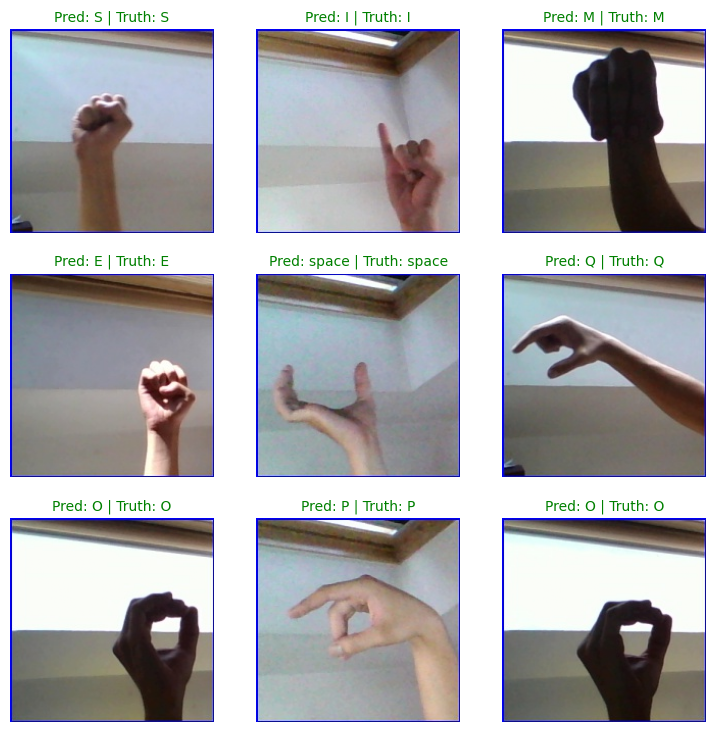

In [90]:
import random

# Get random test samples and their labels
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_dataset), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# Make predictions using the transfer learning model
pred_probs = make_predictions(model=base_model, data=test_samples)
pred_classes = pred_probs.argmax(dim=1)

# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i + 1)

  # Reverse normalization
  normalized_sample = sample * 0.5 + 0.5

  plt.imshow(normalized_sample.permute(1, 2, 0))

  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

plt.show()


## 10.7 - Save and Load current model

In [94]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("final_model")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "Final_ASL_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=base_model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: final_model/Final_ASL_Model.pth


In [95]:
# Rebuild ResNet18 architecture
loaded_model = models.resnet18(pretrained=False)  
loaded_model.fc = nn.Linear(loaded_model.fc.in_features, num_new_classes)

# Load trained weights
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=device))
loaded_model.to(device)
loaded_model.eval()


/Users/jasonflores/Desktop/Personal Projects/ASL-Recognition/venv/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jasonflores/Desktop/Personal Projects/ASL-Recognition/venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  